# kNNによるクラス未知の観測データのクラス判別

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## データセット作成
赤，青，緑の3つのクラスのデータをつくる．
クラスラベルは赤，青，緑の順に，1, 2, 3とします．

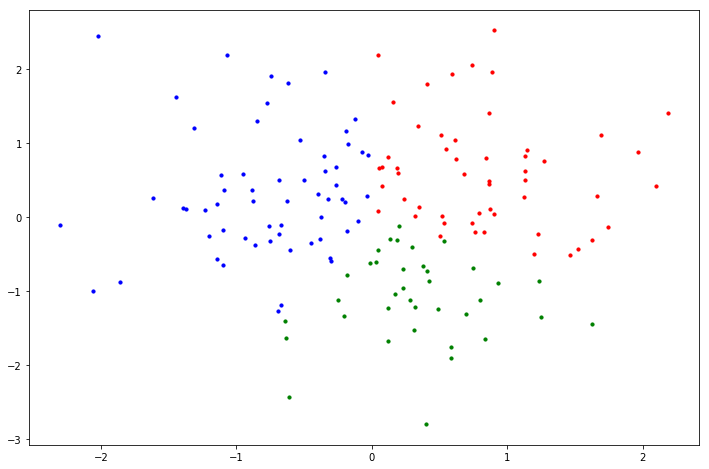

In [7]:
#毎回同じ乱数が生成されるようにseedを固定しておきます．
#再現性を担保するためです．
np.random.seed(seed=1)

x = list(np.random.randn(150))
y = list(np.random.randn(150))

C1x = []
C2x = []
C3x = []
C1y = []
C2y = []
C3y = []
index_list = []

for i,data in enumerate(y):
    if x[i] >= 0:
        if data <= -(x[i])/2: C3y.append(data), C3x.append(x[i]), index_list.append(i)
    else:
        if data <= 2*x[i]: C3y.append(data), C3x.append(x[i]), index_list.append(i)

index_list = np.sort(index_list)[::-1]
for i in index_list:
    x.pop(i)
    y.pop(i)
    
for i,data in enumerate(x):
    if data > 0: C1x.append(data), C1y.append(y[i])
    else: C2x.append(data), C2y.append(y[i])


dataset1 = [[i,j,'1'] for i,j in zip(C1x,C1y)]
dataset2 = [[i,j,'2'] for i,j in zip(C2x,C2y)]
dataset3 = [[i,j,'3'] for i,j in zip(C3x,C3y)]
dataset = np.vstack((dataset1,dataset2,dataset3))

fig = plt.figure(figsize=(12, 8))
plt.scatter(C1x,C1y,color='red',s=10)
plt.scatter(C2x,C2y,color='blue',s=10)
plt.scatter(C3x,C3y,color='green',s=10)
plt.show()


上記の図が，クラスが既知のサンプルのプロット図です．このサンプルを使ってクラス未知の観測データのクラス判別をkNNによって行います．

## クラスが未知のデータを観測
クラスが未知のデータを観測した体で，観測データの特徴量を乱数で決める．
（正規分布に従う乱数を使ってますが，その他でもかまいません．）

[1.12852215 0.14419228]


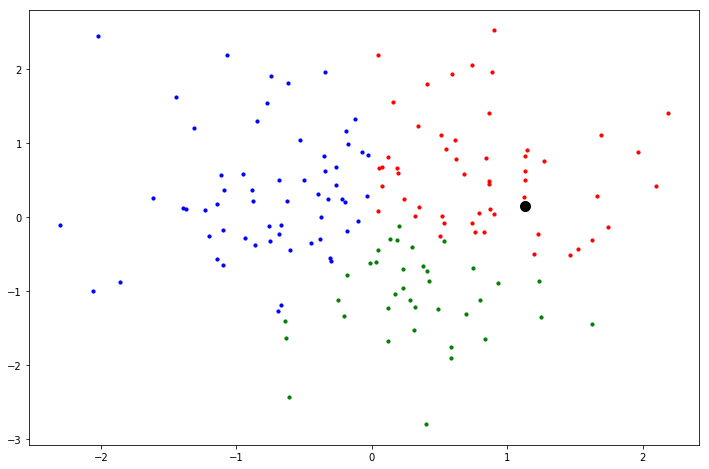

In [23]:
np.random.seed(67)
unknown_data = np.random.randn(2)
print(unknown_data)

fig = plt.figure(figsize=(12, 8))
plt.scatter(C1x,C1y,color='red',s=10)
plt.scatter(C2x,C2y,color='blue',s=10)
plt.scatter(C3x,C3y,color='green',s=10)
plt.scatter(unknown_data[0],unknown_data[1],color='black',s=100)
plt.show()

### クラス未知の観測データをプロットしました．図中の黒点が観測データです．

## kNNによるクラス判別

### kNNの実装
kの値と，クラス未知の観測データの特徴量を受け取ったのち，クラス判別を行い，そのままプロットしてくれる関数を書きます．

In [16]:
def kNN(k,u):
    #全サンプルと観測データ間のユークリッド距離を計算する．
    #その際，距離を計算したサンプルのラベルも記憶しておく
    dist_list = []
    label_list = []
    for i,j in enumerate(dataset):
        dist_list.append([np.sqrt((float(j[0])-u[0])**2+(float(j[1])-u[1])**2),j[2]])
        #print(dist_list[i])
    
    #距離が小さい順に並べ替える
    dist_list.sort()
    #最近傍サンプルk個でクラス判別のための多数決を行う
    class_label = [0,0,0]
    for i in range(k):
        if dist_list[i][1] == '1': class_label[0] += 1
        elif dist_list[i][1] == '2': class_label[1] += 1
        elif dist_list[i][1] == '3': class_label[2] += 1
    
    print("最近傍サンプル",k,"個の内訳 : [赤(1),青(2),緑(3)] =",class_label)
    print()
    print("kNNによる判別の結果，観測データのクラスラベルは", class_label.index(max(class_label))+1, "です．")
    
    if class_label.index(max(class_label))+1 == 1: color = 'red'
    elif class_label.index(max(class_label))+1 == 2: color = 'blue'
    elif class_label.index(max(class_label))+1 == 3: color = 'green'
        
    fig = plt.figure(figsize=(12, 8))
    plt.scatter(C1x,C1y,color='red',s=10)
    plt.scatter(C2x,C2y,color='blue',s=10)
    plt.scatter(C3x,C3y,color='green',s=10)
    plt.scatter(unknown_data[0],unknown_data[1],color=color,s=100)
    plt.show()

最近傍サンプル 10 個の内訳 : [赤(1),青(2),緑(3)] = [10, 0, 0]

kNNによる判別の結果，観測データのクラスラベルは 1 です．


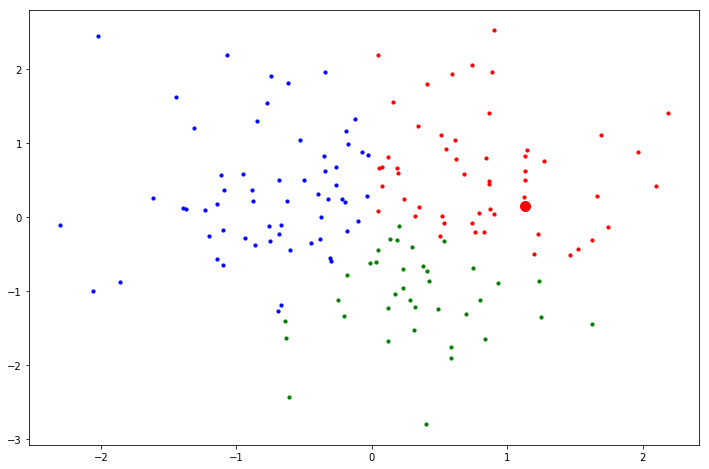

In [25]:
kNN(10,unknown_data)